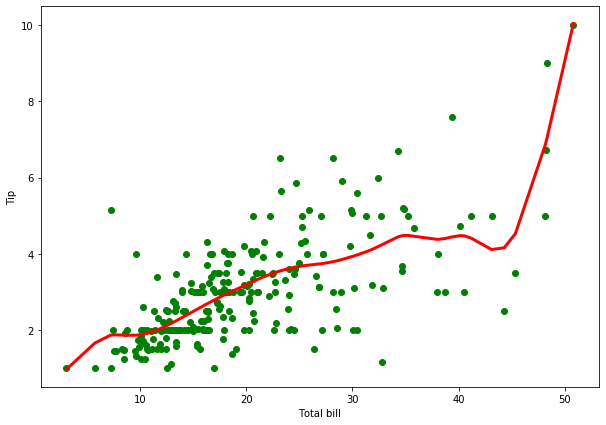

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def kernel(point,xmat,k):
    m,n=np.shape(xmat)
    weight=np.mat(np.eye(m))
    for j in range(m):
        diff=point-X[j]
        weight[j,j]=np.exp(diff*diff.T/(-2.0*k**2))
    return weight
def localweight(point,xmat,ymat,k):
    wei=kernel(point,xmat,k)
    w=(X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return w
def localweightregression(xmat,ymat,k):
    m,n=np.shape(xmat)
    ypred=np.zeros(m)
    for i in range(m):
        ypred[i]=xmat[i]*localweight(xmat[i],xmat,ymat,k)
    return ypred

data=pd.read_csv("data10.csv")
bill=np.array(data.total_bill)
tip=np.array(data.tip)

mbill=np.mat(bill)
mtip=np.mat(tip)
m=np.shape(mbill)
one=np.mat(np.ones(m))
X=np.hstack((one.T,mbill.T))

ypred=localweightregression(X,mtip,2)
SortedIndex=X[:,1].argsort(0)
xsort=X[SortedIndex][:,0]

plt.figure(figsize=(10,7))
plt.subplot(1,1,1)
plt.scatter(bill,tip,color="green")
plt.plot(xsort[:,1],ypred[SortedIndex],color="red",linewidth=3)
plt.xlabel("Total bill")
plt.ylabel("Tip")
plt.show()